In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv', delimiter=',')
display(df)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [4]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [7]:
df['smoking_history'].replace(['never', 'No Info', 'current', 'former', 'ever', 'not current'], [0, 1, 2, 3, 4, 5], inplace=True)
df['gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

In [8]:
df[['smoking_history', 'blood_glucose_level']] = df[['smoking_history', 'blood_glucose_level']].astype(float)
df[['gender', 'hypertension', 'heart_disease']] = df[['gender', 'hypertension', 'heart_disease']].astype(bool)
df['diabetes'] = df['diabetes'].astype('float32')

In [9]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,True,80.0,False,True,0.0,25.19,6.6,140.0,0.0
1,True,54.0,False,False,1.0,27.32,6.6,80.0,0.0
2,False,28.0,False,False,0.0,27.32,5.7,158.0,0.0
3,True,36.0,False,False,2.0,23.45,5.0,155.0,0.0
4,False,76.0,True,True,2.0,20.14,4.8,155.0,0.0


In [10]:
x = df.iloc[:, (df.columns != 'diabetes')]
y = df['diabetes']

In [11]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x.values.reshape(-1, 8), y, test_size=0.2)

In [12]:
print(y_train.value_counts())
Y_train = to_categorical(y_train, y.unique().shape[0]).astype(float) # One-hot
Y_test = to_categorical(y_test, y.unique().shape[0]).astype(float)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

diabetes
0.0    73226
1.0     6774
Name: count, dtype: int64


In [13]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [14]:
print(y_train.value_counts())

diabetes
0.0    73226
1.0     6774
Name: count, dtype: int64


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
model_mlp = Sequential()
model_mlp.add(Dense(128, input_dim= X_train.shape[1]))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(32, activation='relu'))
model_mlp.add(Dense(2, activation='sigmoid'))
model_mlp.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model_mlp.summary()

info = model_mlp.fit(X_train, Y_train, epochs=15, validation_data=(X_test, Y_test), verbose= True)

loss, accuracy = model_mlp.evaluate(X_test, Y_test, verbose = False)
print ('Accuracy ' + str(accuracy))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 11554 (45.13 KB)
Trainable params: 11554 (45.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15


2500/2500 [==============================] - 3s 828us/step - loss: 0.1609 - accuracy: 0.9496 - val_loss: 0.1172 - val_accuracy: 0.9616
Epo

In [16]:
model_mlp.save('mlp_model_v1')

INFO:tensorflow:Assets written to: mlp_model_v1\assets


INFO:tensorflow:Assets written to: mlp_model_v1\assets


In [17]:
Y_pred = model_mlp.predict(X_test)

625/625 [==============================] - 0s 503us/step


In [18]:
from sklearn.metrics import classification_report
classification_rep_svm = classification_report(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18274
           1       0.96      0.69      0.80      1726

    accuracy                           0.97     20000
   macro avg       0.97      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



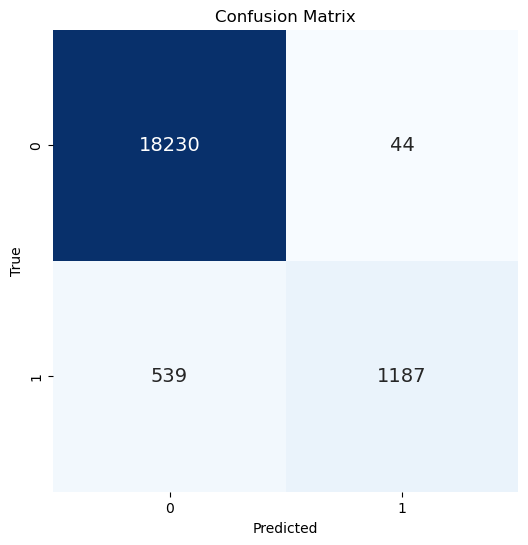

In [19]:
from sklearn.metrics import confusion_matrix

y_pred_classes = (Y_pred > 0.5).astype(int)  # Преобразование вероятностей в бинарные значения

cm = confusion_matrix(Y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()